# Cournot Equilibrium Model

**Randall Romero Aguilar, PhD**

This demo is based on the original Matlab demo accompanying the  <a href="https://mitpress.mit.edu/books/applied-computational-economics-and-finance">Computational Economics and Finance</a> 2001 textbook by Mario Miranda and Paul Fackler.

Original (Matlab) CompEcon file: **demslv05.m**

Running this file requires the Python version of CompEcon. This can be installed with pip by running

    !pip install compecon --upgrade

<i>Last updated: 2022-Sept-04</i>
<hr>


- There are two firms producing same good
- Total cost of producing $q_i$ in firm $i$:
\begin{equation*}
C_i(q_i)=\frac{\beta_i}{2}  q_i^2
\end{equation*}
- Inverse demand function:
\begin{equation*}
P(q_1+q_2)=(q_1+q_2)^{-\alpha}
\end{equation*}
- Firm $i$'s profits:
\begin{equation*}
\pi_i(q_1,q_2)=P(q_1+q_2)q_i-C_i(q_i),
\end{equation*}
- Marginal profit for firm $i$:
\begin{equation*}
\frac{\partial \pi_i}{\partial q_i} = P+P'q_i-C_i'=0
\end{equation*}
- Therefore, equilibrium is characterized by solution to 
\begin{equation*}
f(q)=\begin{bmatrix}P+P'q_1-C_1'\\ P+P'q_2-C_2' \end{bmatrix} = \begin{bmatrix}0\\ 0 \end{bmatrix}
\end{equation*}
- The Jacobian matrix for this function is
\begin{equation*}
f'(q)= \begin{bmatrix}2P'+P''q_1-C_1'' & P'+P''q_1\\ P'+P''q_2 & 2P'+P''q_2-C_2''\end{bmatrix}
\end{equation*}
- Define 
\begin{align*}
q &= \begin{bmatrix}q_1\\ q_2\end{bmatrix}; & \beta &= \begin{bmatrix}\beta_1\\ \beta_2\end{bmatrix}; & C' &= \begin{bmatrix}C'_1\\ C'_2\end{bmatrix}= \begin{bmatrix}\beta_1q_1\\ \beta_2q_2\end{bmatrix} = \beta \odot q
\end{align*}
where $\odot$ denotes the Hadamard (element-by-element) product of two matrices.
- Then we can rewrite the $f$ function and its Jacobian matrix as:
\begin{align*}
f(q)  &= P + (P' - \beta) \odot q \\
f'(q) &= \text{diag}(2P'+P''q - \beta) + \text{diag}(P'+P''q) \begin{bmatrix}0 & 1\\ 1 & 0\end{bmatrix}
\end{align*}


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from compecon import NLP, gridmake

### Parameters and initial value

In [2]:
alpha = 0.625
beta = np.array([0.6, 0.8])

### Set up the Cournot function

In [3]:
def market(q):
    quantity = q.sum()
    price = quantity ** (-alpha)
    return price, quantity

In [4]:
def cournot(q):
    P, Q = market(q)
    P1 = -alpha * P/Q
    P2 = (-alpha - 1) * P1 / Q
    fval = P + (P1 - beta) * q
    fjac = np.diag(2 * P1 + P2 * q - beta) + np.fliplr(np.diag(P1 + P2 * q))
    return fval, fjac

We could also write the function and its Jacobian matrix more explicitly:

    def cournot(q):
        P, Q = market(q)
        P1 = -alpha * P/Q
        P2 = (-alpha - 1) * P1 / Q
        fval = [P + (P1 - beta[0]) * q[0], P + (P1 - beta[0]) * q[0]]
        fjac = [[2 * P1 + P2 * q[0] - beta[0], P1 + P2 * q[0]],
                [P1 + P2 * q[1], 2 * P1 + P2 * q[1] - beta[1]]]
        return fval, fjac

However, the way it was defined earlier, in terms of matrix operations, is more convenient if we were to change the number of firms.        

### Compute equilibrium using Newton method (explicitly)

In [5]:
q = np.array([0.2, 0.2])

for it in range(40):
    f, J = cournot(q)
    step = -np.linalg.solve(J, f)
    q += step
    if np.linalg.norm(step) < 1.e-10: break

price, quantity = market(q)
print(f'Company 1 produces {q[0]:.4f} units, while company 2 produces {q[1]:.4f} units.')
print(f'Total production is {quantity:.4f} and price is {price:.4f}')

Company 1 produces 0.8396 units, while company 2 produces 0.6888 units.
Total production is 1.5284 and price is 0.7671


### Using a NLP object

In [6]:
q0 = [0.2, 0.2]
cournot_problem = NLP(cournot)
q = cournot_problem.newton(q0, show=True)

price, quantity = market(q)
print(f'\nCompany 1 produces {q[0]:.4f} units, while company 2 produces {q[1]:.4f} units.')
print(f'Total production is {quantity:.4f} and price is {price:.4f}')

Solving nonlinear equations by Newton's method
it    bstep  change
--------------------
   0     0  4.64e-01
   1     0  9.53e-02
   2     0  3.47e-03
   3     0  4.20e-06
   4     0  5.77e-12

Company 1 produces 0.8396 units, while company 2 produces 0.6888 units.
Total production is 1.5284 and price is 0.7671


### Generate data for contour plot

In [7]:
n = 100
q1 = np.linspace(0.1, 1.5, n)
q2 = np.linspace(0.1, 1.5, n)
z = np.array([cournot(q)[0] for q in gridmake(q1, q2).T]).T

### Plot figures

Solving nonlinear equations by Newton's method
it    bstep  change
--------------------
   0     0  1.10e+00
   1     0  4.64e-01
   2     0  9.53e-02
   3     0  3.47e-03
   4     0  4.20e-06
Solving nonlinear equations by Broyden's method
it    bstep  change
--------------------
   0     0  4.64e-01
   1     0  2.17e-01
   2     0  5.45e-02
   3     0  1.53e-02
   4     0  1.04e-02
   5     0  4.55e-03
   6     0  1.33e-04
   7     0  2.94e-07
   8     0  1.34e-09


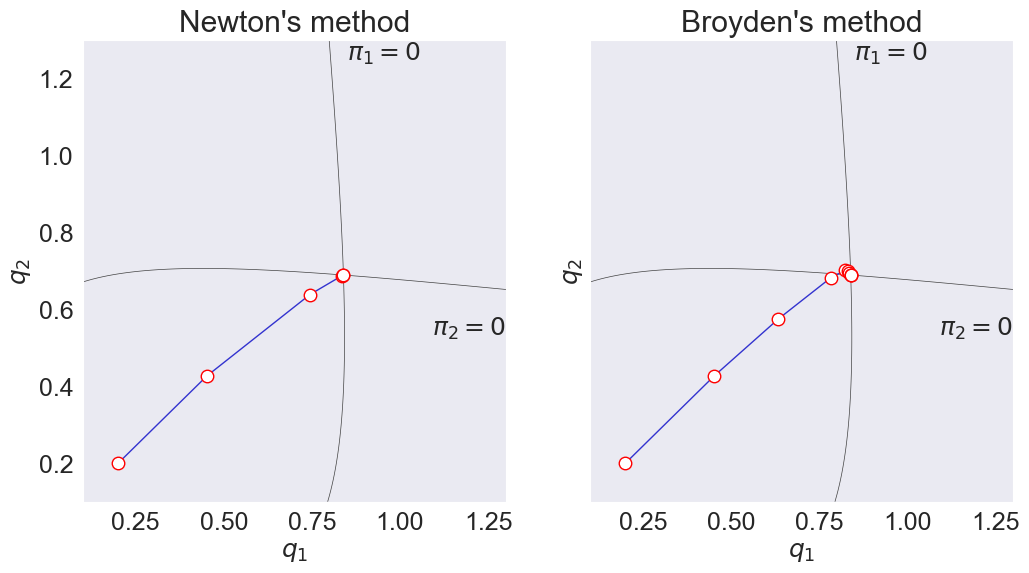

In [8]:
steps_options = {'marker': 'o',
                 'color': (0.2, 0.2, .81),
                 'linewidth': 1.0,
                 'markersize': 9,
                 'markerfacecolor': 'white',
                 'markeredgecolor': 'red'}

contour_options = {'levels': [0.0],
                   'colors': '0.25',
                   'linewidths': 0.5}


Q1, Q2 = np.meshgrid(q1, q2)
Z0 = np.reshape(z[0], (n,n), order='F')
Z1 = np.reshape(z[1], (n,n), order='F')

methods = ['newton', 'broyden']
cournot_problem.opts['maxit', 'maxsteps', 'all_x'] = 10, 0, True

qmin, qmax = 0.1, 1.3

fig, axs = plt.subplots(1,2,figsize=[12,6], sharey=True)
for ax, method in zip(axs, methods):
    x = cournot_problem.zero(method=method)
    ax.set(title=method.capitalize() + "'s method",
           xlabel='$q_1$',
           ylabel='$q_2$',
           xlim=[qmin, qmax],
           ylim=[qmin, qmax])
    ax.contour(Q1, Q2, Z0, **contour_options)
    ax.contour(Q1, Q2, Z1, **contour_options)
    ax.plot(cournot_problem.x_sequence['x_0'], cournot_problem.x_sequence['x_1'], **steps_options)

    ax.annotate('$\pi_1 = 0$', (0.85, qmax), ha='left', va='top')
    ax.annotate('$\pi_2 = 0$', (qmax, 0.55),  ha='right', va='center')